<a href="https://colab.research.google.com/github/Guille-Guille/pix2plot/blob/master/relieve2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lo que he conseguido con este código es que dado un mapa

topográfico (1024 x 512),  te genere su correspondiente mapeo tridimensional.

Para una visualización más ajustada a lo que buscas puedes modificar

tres parametros:

- margen: numero de pixeles que deja a los bordes de la imagen sin pintar
-r cada cuantos pixeles quieres puntar un punto
-h parametro que ajusta la altura  




In [0]:
!unzip Resultados.zip

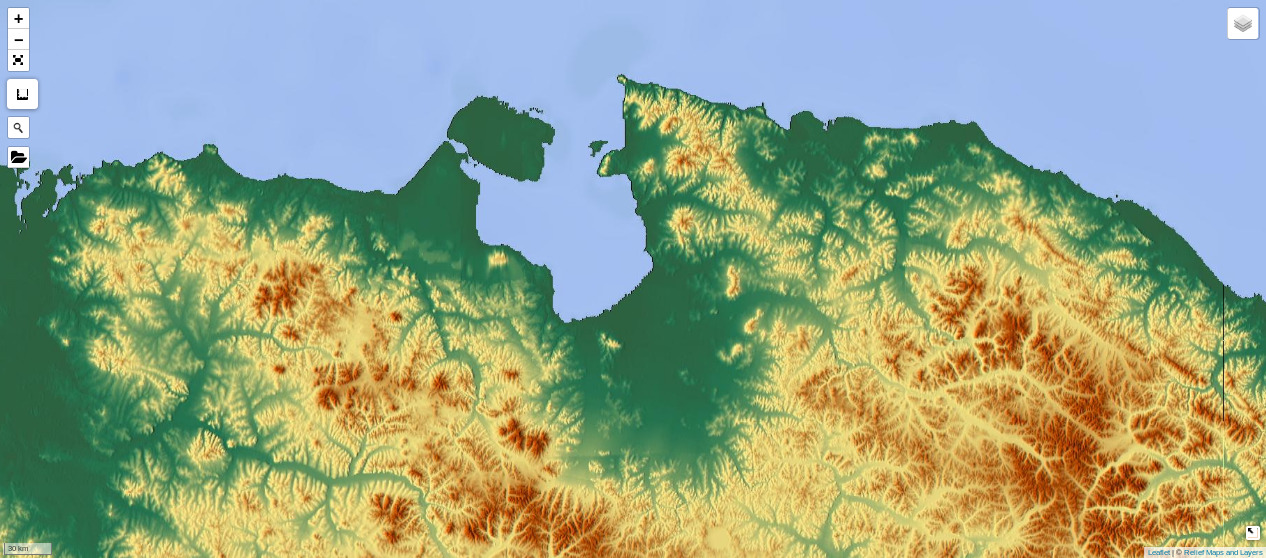

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D


list_img = ! ls -1 Resultados

imagenes = []

for i in range(len(list_img)):
  
  imagenes.append(Image.open("Resultados/" + list_img[i]))
  
  
###############################################
# seleccione aquí la imagen que quiere mapear #
###############################################

imagen1_ = np.array(imagenes[1])
imagenes[1]

In [0]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from skimage import data
from skimage.color import rgb2hsv

hsv_img = rgb2hsv(imagen1_)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

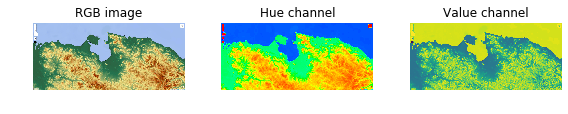

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(imagen1_)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

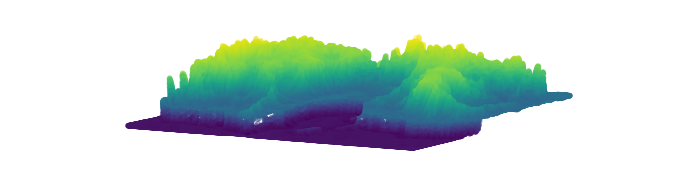

In [17]:


r = 1 # cada cuantos pixeles quieres puntar un punto

margen = 40 # numero de pixeles que deja a los bordes de la imagen sin pintar

h = 0.5 # parametro que ajusta la altura  

fig = plt.figure(figsize = [12,3],)
ax1 = fig.add_subplot(111, projection='3d')

puntos2 = []
for x in range(margen, 512 - margen, r):
  for y in range(margen, 1024 - margen, r):
    puntos2.append([-y, x, -hue_img[x][y]])
    
puntos2 = np.array(puntos2).T

def agua(a):
  for i,j in zip(a, range(len(a))):
    altura = 0.7
    if i > altura:
      a[j] = altura
      
  return a

ax1.scatter([puntos2[0]], [puntos2[1]], [-(agua(-puntos2[2]))**(h)], c = puntos2[2], alpha = 0.4, zdir = 'z')
plt.xscale('linear')
plt.yscale('linear')
plt.axis('off')
plt.show()